### Deliverable 1: Preprocessing the Data for a Neural Network

In [158]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.python import keras

#  Import and read the charity_data.csv.
# import pandas as pd 
# from google.colab import files
# uploaded = files.upload()
# import io
# df = pd.read_csv(io.BytesIO(uploaded['charity_data.csv']))
# Dataset is now stored in a Pandas Dataframe

# We comment out the code below if we wish to use jupyter lab or jupyter notebook instead and comment out the code above
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [159]:
# explore the data
application_df.info() # 12 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [160]:
# check the mix of the target variable
application_df["IS_SUCCESSFUL"].value_counts()

# there appears to be a good mix of successful and not successful applications

1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64

<AxesSubplot:>

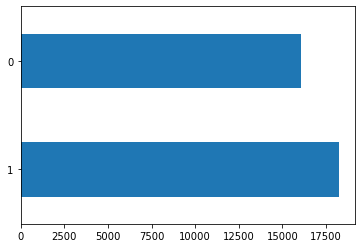

In [161]:
# visualize "IS_SUCCESSFUL" mix
application_df["IS_SUCCESSFUL"].value_counts().plot.barh()

In [162]:
# Look at CLASSIFICATION value counts for binning
classification_type = application_df["CLASSIFICATION"].value_counts()
classification_type

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

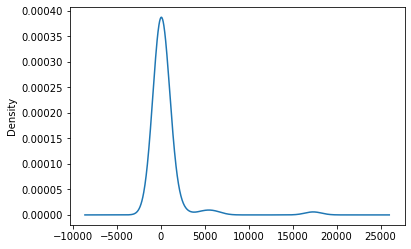

In [163]:
# Visualize the value counts of CLASSIFICATION
classification_type.plot.density()

In [164]:
# Determine which values to replace
replace_classification_type = list(classification_type[classification_type < 500].index)

# Replace in DataFrame
for classification_type in replace_classification_type:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(classification_type, "Other")
    
# check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

<AxesSubplot:ylabel='Density'>

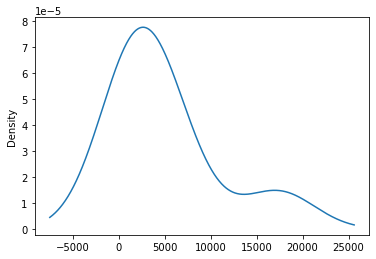

In [165]:
# Visualize the value counts of CLASSIFICATION
application_df.CLASSIFICATION.value_counts().plot.density()

In [166]:
# Look at APPLICATION_TYPE value counts for binning
application_type = application_df.APPLICATION_TYPE.value_counts()
application_type

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

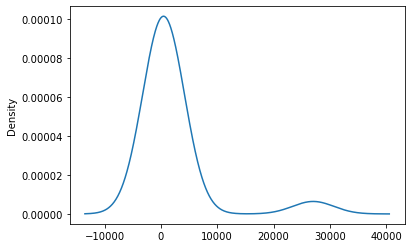

In [167]:
# Visualize the value counts of APPLICATION_TYPE
application_type.plot.density()

In [168]:
# Determine which values to replace
replace_application_type = list(application_type[application_type < 1000].index)

# Replace in DataFrame
for application_type in replace_application_type:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(application_type, "Other")
    
# check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

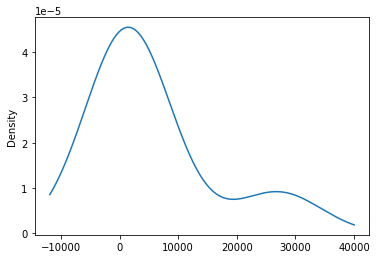

In [169]:
application_df.APPLICATION_TYPE.value_counts().plot.density()

## Re-examine to add "NAME"

### "NAME" and "EIN" were not included in the inital model

Name will be examined in this optimization model

In [170]:
# Determine the number of unique values in the EIN column.
application_df['EIN'].nunique()

# EIN appears to be an index variable and will be dropped

34299

In [171]:
# Drop the non-beneficial ID columns, 'EIN'.
application_df.drop(columns= ["EIN"], inplace=True)
application_df.info() # 10 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NAME                    34299 non-null  object
 1   APPLICATION_TYPE        34299 non-null  object
 2   AFFILIATION             34299 non-null  object
 3   CLASSIFICATION          34299 non-null  object
 4   USE_CASE                34299 non-null  object
 5   ORGANIZATION            34299 non-null  object
 6   STATUS                  34299 non-null  int64 
 7   INCOME_AMT              34299 non-null  object
 8   SPECIAL_CONSIDERATIONS  34299 non-null  object
 9   ASK_AMT                 34299 non-null  int64 
 10  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 2.9+ MB


In [172]:
# Look at NAME value counts for binning
Names = application_df.NAME.value_counts()
Names.head(100) # the 100 most common names are all over 20

PARENT BOOSTER USA INC                                          1260
TOPS CLUB INC                                                    765
UNITED STATES BOWLING CONGRESS INC                               700
WASHINGTON STATE UNIVERSITY                                      492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                  408
                                                                ... 
DAUGHTERS OF ESTHER FELLOWSHIP INTERNATIONAL MINISTRIES INC       24
FUTURE FARMERS OF AMERICA STATE ASSOCIATIONS & LOCAL CHAPTER      24
INTERNATIONAL FEDERATION OF FLY FISHERS INC                       24
BETTER WORLD FUND                                                 23
DEPARTMENT OF WYOMING VFW AUXILIARY                               23
Name: NAME, Length: 100, dtype: int64

<AxesSubplot:ylabel='Density'>

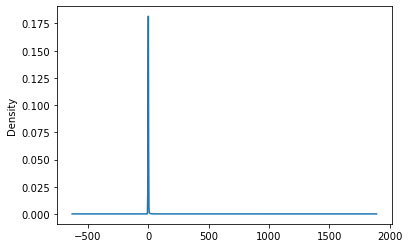

In [173]:
# Visualize the value counts of Names
Names.plot.density()

In [174]:
# Determine which values to replace (started with 20 then examined 10, then 5) kept 20 for simplicity
replace_Names = list(Names[Names < 20].index)

# Replace in DataFrame
for Names in replace_Names:
    application_df.NAME = application_df.NAME.replace(Names, "Other")
    
# check to make sure binning was successful
application_df.NAME.value_counts()

Other                                             22409
PARENT BOOSTER USA INC                             1260
TOPS CLUB INC                                       765
UNITED STATES BOWLING CONGRESS INC                  700
WASHINGTON STATE UNIVERSITY                         492
                                                  ...  
AMERICAN IRIS SOCIETY                                21
ARIZONA FEDERATION OF GARDEN CLUBS                   21
GENERAL FEDERATION OF WOMENS CLUBS ARIZONA INC       20
DISABLED AMERICAN VETERANS AUXILIARY INC             20
TEXAS MASTER GARDENER ASSOCIATION INC                20
Name: NAME, Length: 122, dtype: int64

<AxesSubplot:ylabel='Density'>

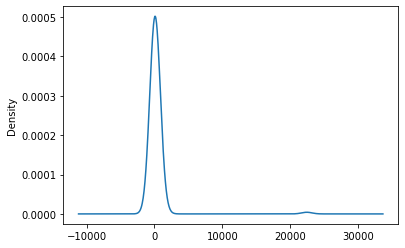

In [175]:
# Visualize the value counts of Names after binning (tried 20, 10 and 5 not very different)
application_df.NAME.value_counts().plot.density()

In [176]:
# Generate our categorical variable list (having Dtype of "object")
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_df[application_cat].nunique()

NAME                      122
APPLICATION_TYPE            6
AFFILIATION                 6
CLASSIFICATION              7
USE_CASE                    5
ORGANIZATION                4
INCOME_AMT                  9
SPECIAL_CONSIDERATIONS      2
dtype: int64

In [177]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\yvari\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,NAME_ALTRUSA INTERNATIONAL FOUNDATION INC,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN INC,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [178]:
encode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Columns: 161 entries, NAME_AIR FORCE ASSOCIATION to SPECIAL_CONSIDERATIONS_Y
dtypes: float64(161)
memory usage: 42.1 MB


In [179]:
encode_df.shape

(34299, 161)

Now that our categorical variables have been encoded, they are ready to replace our unencoded categorical variables in our dataset.

To replace these columns, we'll use a combination of Pandas' merge and drop methods. Add and run the following code in the notebook:

In [180]:
# Merge one-hot encoded features and drop the originals
#  YOUR CODE GOES HERE
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

C:\Users\yvari\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,NAME_ALTRUSA INTERNATIONAL FOUNDATION INC,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [181]:
# check that all columns are numeric
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Columns: 164 entries, STATUS to SPECIAL_CONSIDERATIONS_Y
dtypes: float64(161), int64(3)
memory usage: 42.9 MB


In [182]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values

In [183]:
X = application_df.drop(["IS_SUCCESSFUL"],1)
X

C:\Users\yvari\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,STATUS,ASK_AMT,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,NAME_ALTRUSA INTERNATIONAL FOUNDATION INC,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [184]:
columns = X.columns
columns

Index(['STATUS', 'ASK_AMT', 'NAME_AIR FORCE ASSOCIATION',
       'NAME_ALABAMA FEDERATION OF WOMENS CLUBS',
       'NAME_ALABAMA TREASURE FOREST ASSOCIATION', 'NAME_ALPHA PHI SIGMA',
       'NAME_ALPHA PHI SIGMA INC', 'NAME_ALTRUSA INTERNATIONAL FOUNDATION INC',
       'NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES',
       'NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC',
       ...
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M',
       'INCOME_AMT_25000-99999', 'INCOME_AMT_50M+', 'INCOME_AMT_5M-10M',
       'SPECIAL_CONSIDERATIONS_N', 'SPECIAL_CONSIDERATIONS_Y'],
      dtype='object', length=163)

In [185]:
X = X.values

In [186]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [187]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [188]:
# examine the result of StandardScaler
X_train_scaled

# note values now between -1 and 1
# this is important to note when selecting an activation function later

array([[ 0.01394306, -0.03348439, -0.05407486, ..., -0.06987849,
         0.02789425, -0.02789425],
       [ 0.01394306, -0.03348439, -0.05407486, ..., -0.06987849,
         0.02789425, -0.02789425],
       [ 0.01394306, -0.03348439, -0.05407486, ..., -0.06987849,
         0.02789425, -0.02789425],
       ...,
       [ 0.01394306, -0.03229417, -0.05407486, ..., -0.06987849,
         0.02789425, -0.02789425],
       [ 0.01394306, -0.03348439, -0.05407486, ..., -0.06987849,
         0.02789425, -0.02789425],
       [ 0.01394306, -0.01093629, -0.05407486, ..., -0.06987849,
         0.02789425, -0.02789425]])

In [189]:
# check the number of features in X
len(X_train[0])


# note this is important to note when selecting the number of neurons in a layer

163

### Deliverable 2: Compile, Train and Evaluate the Model

In [190]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# this is done using the classes within the Keras module
number_input_features = X_train.shape[1]
hidden_nodes_layer1 = (number_input_features * 3)
hidden_nodes_layer2 = (number_input_features * 1)
hidden_nodes_layer3 = (number_input_features * 0.50)

nn_optimized = tf.keras.models.Sequential()

# First hidden layer
nn_optimized.add(
    tf.keras.layers.Dense(
        units=hidden_nodes_layer1, 
        input_dim=number_input_features, 
        activation="tanh")
)

# Second hidden layer
nn_optimized.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, 
    activation="tanh")
)

# third hidden layer
nn_optimized.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer3,
    activation="tanh"
))

# Output layer
nn_optimized.add(tf.keras.layers.Dense(
    units=1, 
    activation="sigmoid"
))

# Check the structure of the model
nn_optimized.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 489)               80196     
_________________________________________________________________
dense_9 (Dense)              (None, 163)               79870     
_________________________________________________________________
dense_10 (Dense)             (None, 81)                13284     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 82        
Total params: 173,432
Trainable params: 173,432
Non-trainable params: 0
_________________________________________________________________


Now that we have our training data ready, we can implement checkpoints to our deep learning model.

Now that we have our training data and our model defined, we're ready to compile and train our model using checkpoints. To use checkpoints, we need to define the checkpoint file name and directory path. For our purposes, we'll label our checkpoints by epoch number and contain them within their own folder. This ensures that our checkpoint files are neat, organized, and easily identifiable. Add and run the following code to our notebook:

In [191]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("optimized_checkpoints/",exist_ok=True)
checkpoint_path = "optimized_checkpoints/weights.{epoch:02d}.hdf5"

In [192]:
# Compile the model
nn_optimized.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [193]:
# creat a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose= 1,
    save_weights_only=True,
    save_freq=1000
)   

In [194]:
# Train the model
fit_model = nn_optimized.fit(X_train_scaled,y_train,epochs=100)

Train on 25724 samples
Epoch 1/100
25724/25724 [==============================] - 4s 138us/sample - loss: 0.4831 - accuracy: 0.7620
Epoch 2/100
25724/25724 [==============================] - 3s 104us/sample - loss: 0.4632 - accuracy: 0.7708
Epoch 3/100
25724/25724 [==============================] - 2s 94us/sample - loss: 0.4596 - accuracy: 0.7749
Epoch 4/100
25724/25724 [==============================] - 3s 102us/sample - loss: 0.4571 - accuracy: 0.7741
Epoch 5/100
25724/25724 [==============================] - 3s 113us/sample - loss: 0.4562 - accuracy: 0.7758
Epoch 6/100
25724/25724 [==============================] - 3s 135us/sample - loss: 0.4543 - accuracy: 0.7781
Epoch 7/100
25724/25724 [==============================] - 3s 121us/sample - loss: 0.4537 - accuracy: 0.7784
Epoch 8/100
25724/25724 [==============================] - 3s 126us/sample - loss: 0.4523 - accuracy: 0.7798
Epoch 9/100
25724/25724 [==============================] - 3s 120us/sample - loss: 0.4508 - accuracy: 0.78

In [195]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_optimized.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 1s - loss: 0.4738 - accuracy: 0.7696
Loss: 0.47375436157248807, Accuracy: 0.7695626616477966


<AxesSubplot:>

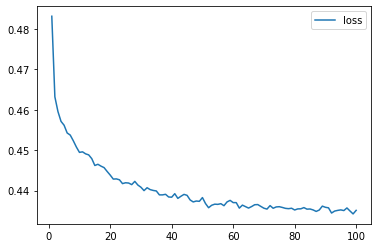

In [196]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

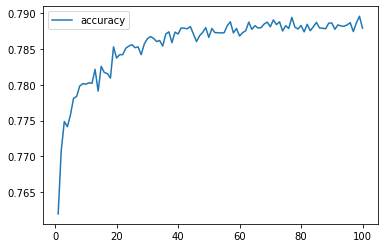

In [197]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [198]:
# Save and export your results to an HDF5 file, and name it AlphabetSoupCharity_Optimization.h5
nn_optimized.save("Resources/AlphabetSoupCharity_Optimization01.h5")